# Experimenting with the NASnet CNN Architecture to classify melanoma images as Benign or Malignant

This was developed using Juypter Notebooks on my local computer, not on Google Colab. This was because Google Drive could not handle the large number of files in the training and testing sets and was causing a lot of instability.

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import NASNetMobile

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(
    "./train",
    target_size=(224, 224),
    batch_size=20,
    class_mode="binary"
)

Found 700 images belonging to 2 classes.


In [11]:
validation_generator = validation_datagen.flow_from_directory(
    "./validation",
    target_size=(224, 224),
    batch_size=20,
    class_mode="binary"
)

Found 234 images belonging to 2 classes.


In [7]:
validation_generator = validation_datagen.flow_from_directory(
    "./train",
    target_size=(224, 224),
    batch_size=20,
    class_mode="binary"
)

Found 700 images belonging to 2 classes.


In [2]:
nas_net = NASNetMobile(
    weights="imagenet", 
    include_top=False, 
    input_shape=(224, 224, 3),
    pooling="max"
)

In [3]:
model = tf.keras.models.Sequential()
model.add(nas_net)
model.add(tf.keras.layers.Dense(units=224, activation='relu'))
model.add(tf.keras.layers.Dense(units=224, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
NASNet (Functional)          (None, 1056)              4269716   
_________________________________________________________________
dense (Dense)                (None, 224)               236768    
_________________________________________________________________
dense_1 (Dense)              (None, 224)               50400     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 225       
Total params: 4,557,109
Trainable params: 4,520,371
Non-trainable params: 36,738
_________________________________________________________________


In [8]:
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(lr=1e-4),
    metrics=['acc']
)

In [13]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs = 5,
    verbose=2
)

Epoch 1/5
35/35 - 104s - loss: 0.0859 - acc: 0.9714 - val_loss: 1.3466 - val_acc: 0.5470
Epoch 2/5
35/35 - 116s - loss: 0.0580 - acc: 0.9886 - val_loss: 1.4982 - val_acc: 0.5385
Epoch 3/5
35/35 - 107s - loss: 0.0380 - acc: 0.9900 - val_loss: 1.4090 - val_acc: 0.5641
Epoch 4/5
35/35 - 120s - loss: 0.0311 - acc: 0.9914 - val_loss: 1.8526 - val_acc: 0.5342
Epoch 5/5
35/35 - 111s - loss: 0.0386 - acc: 0.9871 - val_loss: 1.3940 - val_acc: 0.5598


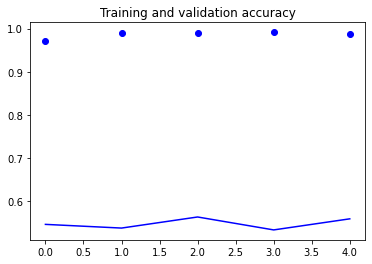

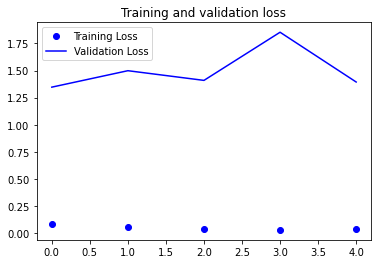

In [14]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()